In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
data = pd.read_csv('hour.csv',sep=',')
data.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

In [3]:
data.rename(columns={
                    'instant':'rec_id',
                    'dteday':'datetime',
                    'yr':'year',
                    'mnth':'month',
                    'hr': 'hour',
                    'weathersit':'weather_condition', 
                    'hum':'humidity',
                    'cnt':'total_count'
                },inplace=True)

In [4]:
data.head()

rec_id    datetime  season  year  month  hour  holiday  weekday  \
0       1  2011-01-01       1     0      1     0        0        6   
1       2  2011-01-01       1     0      1     1        0        6   
2       3  2011-01-01       1     0      1     2        0        6   
3       4  2011-01-01       1     0      1     3        0        6   
4       5  2011-01-01       1     0      1     4        0        6   

   workingday  weather_condition  temp   atemp  humidity  windspeed  casual  \
0           0                  1  0.24  0.2879      0.81        0.0       3   
1           0                  1  0.22  0.2727      0.80        0.0       8   
2           0                  1  0.22  0.2727      0.80        0.0       5   
3           0                  1  0.24  0.2879      0.75        0.0       3   
4           0                  1  0.24  0.2879      0.75        0.0       0   

   registered  total_count  
0          13           16  
1          32           40  
2          27           32  
3          10           13  
4           1            1

In [5]:
data.drop(data[['rec_id', 'datetime']], axis=1, inplace=True)

In [6]:
data

season  year  month  hour  holiday  weekday  workingday  \
0           1     0      1     0        0        6           0   
1           1     0      1     1        0        6           0   
2           1     0      1     2        0        6           0   
3           1     0      1     3        0        6           0   
4           1     0      1     4        0        6           0   
...       ...   ...    ...   ...      ...      ...         ...   
17374       1     1     12    19        0        1           1   
17375       1     1     12    20        0        1           1   
17376       1     1     12    21        0        1           1   
17377       1     1     12    22        0        1           1   
17378       1     1     12    23        0        1           1   

       weather_condition  temp   atemp  humidity  windspeed  casual  \
0                      1  0.24  0.2879      0.81     0.0000       3   
1                      1  0.22  0.2727      0.80     0.0000       8   
2                      1  0.22  0.2727      0.80     0.0000       5   
3                      1  0.24  0.2879      0.75     0.0000       3   
4                      1  0.24  0.2879      0.75     0.0000       0   
...                  ...   ...     ...       ...        ...     ...   
17374                  2  0.26  0.2576      0.60     0.1642      11   
17375                  2  0.26  0.2576      0.60     0.1642       8   
17376                  1  0.26  0.2576      0.60     0.1642       7   
17377                  1  0.26  0.2727      0.56     0.1343      13   
17378                  1  0.26  0.2727      0.65     0.1343      12   

       registered  total_count  
0              13           16  
1              32           40  
2              27           32  
3              10           13  
4               1            1  
...           ...          ...  
17374         108          119  
17375          81           89  
17376          83           90  
17377          48           61  
17378          37           49  

[17379 rows x 15 columns]

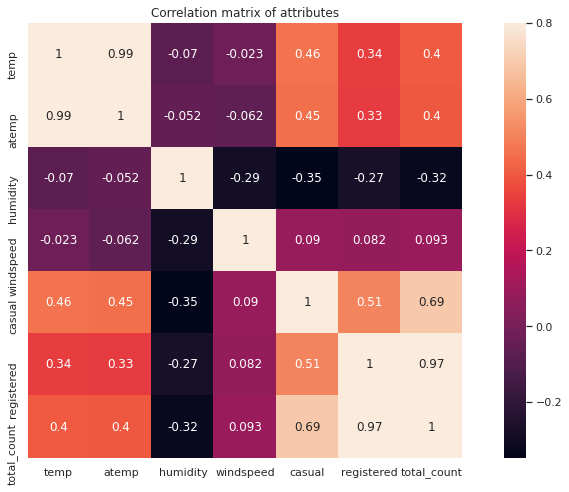

In [7]:
correMtr=data[["temp","atemp","humidity","windspeed","casual","registered","total_count"]].corr()
mask=np.array(correMtr)
mask[np.tril_indices_from(mask)]=False
fig,ax=plt.subplots(figsize=(15,8))
sns.heatmap(correMtr,vmax=0.8,square=True,annot=True,ax=ax)
ax.set_title('Correlation matrix of attributes')
plt.show()

In [8]:
X=data[['temp', 'registered']]

In [9]:
X.head()

temp  registered
0  0.24          13
1  0.22          32
2  0.22          27
3  0.24          10
4  0.24           1

In [10]:
X=np.array(X)

### K-means

In [11]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2,
            init='random',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=42)
y_km = km.fit_predict(X)

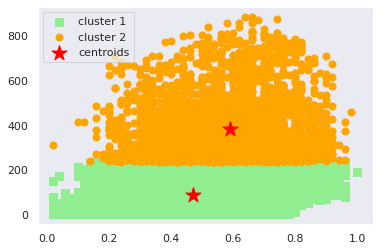

In [12]:
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50,
            c='lightgreen',
            marker='s',
            label='cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50,
            c='orange',
            marker='o',
            label='cluster 2')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250,
            marker='*',
            c='red',
            label='centroids')
plt.legend()
plt.grid()
plt.show()

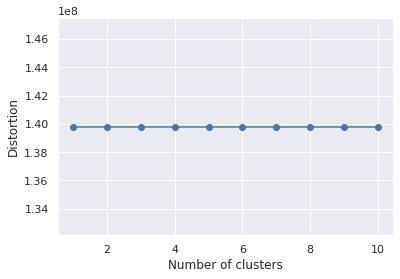

In [13]:
distortions = []
for i in range(1, 11):
    k_means = KMeans(
        n_clusters=i,
        init='random',
        n_init=10,
        max_iter=300,
        random_state=0,
    )
    k_means.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [14]:
from sklearn .cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import linkage
from scipy.spatial.distance import pdist, squareform

In [15]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
labels = model.fit_predict(X)
print('Метки классов: %s' % labels)

Метки классов: [0 0 0 ... 0 0 0]


In [16]:
row_dist = pd.DataFrame(squareform(pdist(X, metric='euclidean')))
row_dist

0          1          2          3           4           5      \
0       0.000000  19.000011  14.000014   3.000000   12.000000   12.000000   
1      19.000011   0.000000   5.000000  22.000009   31.000006   31.000006   
2      14.000014   5.000000   0.000000  17.000012   26.000008   26.000008   
3       3.000000  22.000009  17.000012   0.000000    9.000000    9.000000   
4      12.000000  31.000006  26.000008   9.000000    0.000000    0.000000   
...          ...        ...        ...        ...         ...         ...   
17374  95.000002  76.000011  81.000010  98.000002  107.000002  107.000002   
17375  68.000003  49.000016  54.000015  71.000003   80.000002   80.000002   
17376  70.000003  51.000016  56.000014  73.000003   82.000002   82.000002   
17377  35.000006  16.000050  21.000038  38.000005   47.000004   47.000004   
17378  24.000008   5.000160  10.000080  27.000007   36.000006   36.000006   

            6           7           8           9      ...       17369  \
0       13.000015   11.000073    6.000000    7.000457  ...  172.000005   
1       32.000000   30.000007   25.000008   26.000192  ...  153.000012   
2       27.000000   25.000008   20.000010   21.000238  ...  158.000011   
3       10.000020    8.000100    3.000000    4.000800  ...  175.000005   
4        1.000200    1.000800    6.000000    5.000640  ...  184.000004   
...           ...         ...         ...         ...  ...         ...   
17374  108.000007  106.000017  101.000002  102.000018  ...   77.000003   
17375   81.000010   79.000023   74.000003   75.000024  ...  104.000002   
17376   83.000010   81.000022   76.000003   77.000023  ...  102.000002   
17377   48.000017   46.000039   41.000005   42.000043  ...  137.000001   
17378   37.000022   35.000051   30.000007   31.000058  ...  148.000001   

            17370       17371       17372       17373       17374      17375  \
0      233.000003  171.000001  137.000001   99.000002   95.000002  68.000003   
1      214.000008  152.000005  118.000007   80.000010   76.000011  49.000016   
2      219.000008  157.000005  123.000007   85.000009   81.000010  54.000015   
3      236.000003  174.000001  140.000001  102.000002   98.000002  71.000003   
4      245.000003  183.000001  149.000001  111.000002  107.000002  80.000002   
...           ...         ...         ...         ...         ...        ...   
17374  138.000001   76.000000   42.000000    4.000000    0.000000  27.000000   
17375  165.000001  103.000000   69.000000   31.000000   27.000000   0.000000   
17376  163.000001  101.000000   67.000000   29.000000   25.000000   2.000000   
17377  198.000001  136.000000  102.000000   64.000000   60.000000  33.000000   
17378  209.000001  147.000000  113.000000   75.000000   71.000000  44.000000   

           17376      17377      17378  
0      70.000003  35.000006  24.000008  
1      51.000016  16.000050   5.000160  
2      56.000014  21.000038  10.000080  
3      73.000003  38.000005  27.000007  
4      82.000002  47.000004  36.000006  
...          ...        ...        ...  
17374  25.000000  60.000000  71.000000  
17375   2.000000  33.000000  44.000000  
17376   0.000000  35.000000  46.000000  
17377  35.000000   0.000000  11.000000  
17378  46.000000  11.000000   0.000000  

[17379 rows x 17379 columns]

In [17]:
colums = ['label 1', 'label 2', 'distance', 'no. of items in clust.']

In [18]:
# 1. Squareform distance matrix
row_clusters = linkage(row_dist, method='complete', metric='euclidean')
pd.DataFrame(row_clusters,
             columns=colums,
             index=[f'cluster {i +1}' for i in range(row_clusters.shape[0])],
            )

<ipython-input-18-1c06582b6c83>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  row_clusters = linkage(row_dist, method='complete', metric='euclidean')


label 1  label 2      distance  no. of items in clust.
cluster 1          0.0   7452.0      0.000000                     2.0
cluster 2          1.0    399.0      0.000000                     2.0
cluster 3          2.0    461.0      0.000000                     2.0
cluster 4          3.0    784.0      0.000000                     2.0
cluster 5          4.0      5.0      0.000000                     2.0
...                ...      ...           ...                     ...
cluster 17374  34743.0  34749.0  26585.687573                 14673.0
cluster 17375  34746.0  34748.0  30894.851301                   643.0
cluster 17376  34751.0  34752.0  43569.245382                 16601.0
cluster 17377  34750.0  34753.0  52367.409166                   778.0
cluster 17378  34754.0  34755.0  88915.777851                 17379.0

[17378 rows x 4 columns]

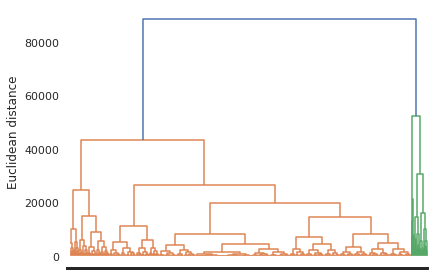

In [19]:
from scipy.cluster.hierarchy import dendrogram

row_dendr = dendrogram(row_clusters, labels=labels)
plt.tight_layout()
plt.ylabel('Euclidean distance')

plt.show()

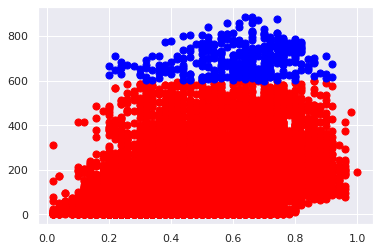

In [21]:
X=data[['temp', 'registered']]
X = X.values
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.show()

### DBScan

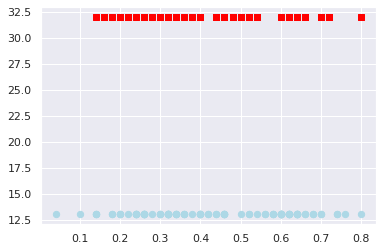

In [24]:
from sklearn.cluster import DBSCAN
db_scan = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db_scan = db_scan.fit_predict(X)
plt.scatter(X[y_db_scan == 0, 0], X[y_db_scan == 0, 1], c='lightblue', marker='o', s=40, label='Кластер 1')
plt.scatter(X[y_db_scan == 1, 0], X[y_db_scan == 1, 1], c='red', marker='s', s=40, label='Кластер 2')
plt.show()